# Mounting Google Docs and importing libraries



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import time
import math
import numpy as np
import torch.optim as optim
import math
import torchvision
import torchvision.transforms as transforms
import time
from collections import defaultdict
from torch import nn as nn

Mounted at /content/drive


#Data Processing

In [ ]:
def balance(in_folder, out_folder):
  for folder in os.listdir(in_folder):
    num = 0
    folder_path = os.path.join(in_folder, folder)
    for img in os.listdir(folder_path):
      img_in_path = os.path.join(in_folder, folder, img)
      img_out_path = os.path.join(out_folder, folder, img)
      if num < 77:
        with Image.open(img_in_path) as img:
          img.save(img_out_path)
      num += 1
  print("balanced")

def image_processing(in_folder, out_folder):
  for img in os.listdir(in_folder):
    angle = 0
    img_in_path = os.path.join(in_folder, img)
    img_out_path = os.path.join(out_folder, img)
    for i in range(4):
      with Image.open(img_in_path) as img:
        img = img.rotate(angle)
        img.save(img_out_path[:-4] + '_' + str(angle) + '.jpg')
      angle += 90
  print("done")

def process_everything(original_path, augmented_path):
  for folder in os.listdir(original_path):
    first_path = os.path.join(original_path, folder)
    second_path = os.path.join(augmented_path, folder)
    image_processing(first_path, second_path)
  print("actually done")

def got_fucked():
  list_of_subfolders = ["actinic keratosis", "basal cell carcinoma", "dermatofibroma", "melanoma", "nevus",
                     "pigmented benign keratosis", "seborrheic keratosis", "squamous cell carcinoma", "vascular lesion"]
  list_of_mainfolders = ["Train", "Test"]
  augmented_path = "/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Augmented Data"
  # augmented_path = "/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augumented Data"
  os.mkdir(augmented_path)
  os.mkdir(os.path.join(augmented_path, "Train"))
  os.mkdir(os.path.join(augmented_path, "Test"))
  for subfolder in list_of_subfolders:
    os.mkdir(os.path.join(augmented_path, "Train", subfolder))
    os.mkdir(os.path.join(augmented_path, "Test", subfolder))
  print("made the folders again")
original_train_path = '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
# original_train_path = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
# balanced_train_path = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Balanced Data/Train'
balanced_train_path = '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Balanced Data/Train'
# original_test_path = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
original_test_path = '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
# augmented_train_path = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data/Train'
augmented_train_path = '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Augmented Data/Train'
# augmented_test_path = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data/Test'
augmented_test_path = '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Augmented Data/Test'

process_everything(balanced_train_path, augmented_train_path)
process_everything(original_test_path, augmented_test_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Balanced Data/Train'

In [ ]:
# Test Code For Image Size [Do NOT Remove for now]

#img_path = r'/content/drive/MyDrive/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg'
def print_img(path):
# Open the image
  with Image.open(path) as img:
      # Display the original image
      plt.imshow(img)
      plt.title("Original Image")
      plt.show()

      # Apply the transformation
      transform = transforms.Resize((244,244))
      img_new = transform(img)

      # Convert the transformed image to a format that can be displayed and then display it
      plt.imshow(img_new)
      plt.title("Transformed Image")
      plt.show()
path_original = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg'
print_img(path_original)
path_augmented = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data/Test/actinic keratosis/ISIC_0010512_0.jpg'
print_img(path_augmented)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg'

In [ ]:
# Note: Directory May Not Work for you as this is Henrique's, so if you want to test the code, use your own dir

# folder = r'/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration'
folder = r'/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration'
for dataset in os.listdir(folder):
  dataset_path = os.path.join(folder, dataset)
  for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    for img in os.listdir(label_path):
      img_path = os.path.join(label_path, img)
      with Image.open(img_path) as img:
        transform = transforms.ToTensor()
        img_tensor = transform(img)
        print(img_tensor.shape)


In [ ]:
folder = r'/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration'

for dataset in os.listdir(folder):
  dataset_path = os.path.join(folder, dataset)
  print(dataset)
  for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    sizes = []
    img_sizes_freq = defaultdict(int)
    for img in os.listdir(label_path):
      img_path = os.path.join(label_path, img)
      with Image.open(img_path) as img:
        transform = transforms.ToTensor()
        img_tensor = transform(img)
        sizes.append(img_tensor.shape)
    for size in sizes:
      img_sizes_freq[size] += 1
    max_size = None
    max_count = 0
    for size, count in img_sizes_freq.items():
      if count > max_count:
        max_size = size
        max_count = count

    print(f'Label: {label}')
    for size, count in img_sizes_freq.items():
      if size == max_size:
        print(f'  Most frequent size: {size}, Count: {count} (most frequent)')
      else:
        print(f'  Size: {size}, Count: {count}')
  print()


In [ ]:
folder = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Skin cancer ISIC The International Skin Imaging Collaboration'
size = {}
for dataset in os.listdir(folder):
  dataset_path = os.path.join(folder, dataset)
  print(dataset)
  for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    size[label + ' ' + dataset] = 0
    for img in os.listdir(label_path):
      size[label + ' ' + dataset] += 1
    print(label + ' ' + str(size[label + ' ' + dataset]))
  print('\n')





#Baseline Code


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import LabelBinarizer

# Helper functions
def plot_training_curve(train_accuracy, val_accuracy, train_loss, val_loss):
    epochs = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Data preparation
img_size = [224, 224]
directory = '/content/drive/MyDrive/Aps360/APS 360 Team Folder/Dataset/Balanced Data/Train'
classes = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = ImageFolder(root=directory, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=21, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=21, shuffle=False)

# Extract features
resnet = resnet18(pretrained=True)
resnet = nn.Sequential(*list(resnet.children())[:-1])

def extract_features(dataloader):
    resnet.eval()
    features = []
    labels = []
    with torch.no_grad():
        for images, lbls in dataloader:
            outputs = resnet(images)
            features.append(outputs.view(outputs.size(0), -1).cpu().numpy())
            labels.append(lbls.cpu().numpy())
    return np.concatenate(features), np.concatenate(labels)

train_features, train_labels = extract_features(train_loader)
val_features, val_labels = extract_features(val_loader)

lb = LabelBinarizer()
train_labels_bin = lb.fit_transform(train_labels)
val_labels_bin = lb.transform(val_labels)

svm_classifier = SVC(kernel='linear', probability=True)
num_epochs = 10
batch_size = 21
train_indices = np.arange(len(train_features))

train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    np.random.shuffle(train_indices)
    epoch_train_features = train_features[train_indices]
    epoch_train_labels = train_labels[train_indices]

    for i in range(0, len(train_features), batch_size):
        batch_features = epoch_train_features[i:i+batch_size]
        batch_labels = epoch_train_labels[i:i+batch_size]
        unique_labels = np.unique(batch_labels)
        if len(unique_labels) == len(classes):
            svm_classifier.fit(batch_features, batch_labels)

    train_pred = svm_classifier.predict(train_features)
    val_pred = svm_classifier.predict(val_features)

    train_prob = svm_classifier.predict_proba(train_features)
    val_prob = svm_classifier.predict_proba(val_features)

    train_accuracy.append(accuracy_score(train_labels, train_pred))
    val_accuracy.append(accuracy_score(val_labels, val_pred))

    # Handle log loss calculation correctly
    # Add missing columns if necessary
    train_prob_complete = np.zeros((train_prob.shape[0], len(classes)))
    val_prob_complete = np.zeros((val_prob.shape[0], len(classes)))

    for i, class_idx in enumerate(lb.classes_):
        if class_idx in np.unique(train_pred):
            train_prob_complete[:, class_idx] = train_prob[:, i]
        if class_idx in np.unique(val_pred):
            val_prob_complete[:, class_idx] = val_prob[:, i]

    train_loss.append(log_loss(train_labels_bin, train_prob_complete, labels=range(len(classes))))
    val_loss.append(log_loss(val_labels_bin, val_prob_complete, labels=range(len(classes))))

    print(f'Epoch {epoch + 1}/{num_epochs} - Train Accuracy: {train_accuracy[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.4f}, Train Loss: {train_loss[-1]:.4f}, Validation Loss: {val_loss[-1]:.4f}')

# Plot the training and validation metrics
plot_training_curve(train_accuracy, val_accuracy, train_loss, val_loss)

print('Finished Training')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total time elapsed: {elapsed_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ValueError: The object was not fitted with multilabel input.

# Primary Model

In [ ]:
class CancerIdentifier(nn.Module):
    def __init__(self):
        super(CancerIdentifier, self).__init__()

        self.name = 'CancerIdentifier'

        # Convolutional Layers
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.conv2 = nn.Conv2d(5, 10, 5)

        # Pooling Layers
        self.pool = nn.MaxPool2d(2, 2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(10 * 58 * 58, 244)
        self.fc2 = nn.Linear(244, 9) # Number of Classes

        # DropOut (Probability = 0.5)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten
        x = x.view(-1, 10 * 58 * 58)

        # Fully Connected w/ ReLU Activation and Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        #Output Layer
        x = self.fc2(x)

        return x

In [ ]:
class cnn1(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = 'cnn1'
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=4, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 30 * 30, 512)
        self.fc2 = nn.Linear(512, 9)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
class cnn2(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = 'cnn2'

        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)

        self.bn1 = nn.BatchNorm2d(16)

        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 61 * 61, 512)
        self.fc2 = nn.Linear(512, 9)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
class ComplexCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = 'ComplexCNN'

        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)

        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # Convolutional Layer 3
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        # Convolutional Layer 4
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        # Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully Connected Layer 1
        self.fc1 = nn.Linear(128 * 15 * 15, 1024)  # Assuming input images are 64x64
        self.dropout1 = nn.Dropout(0.5)

        # Fully Connected Layer 2
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)

        # Output Layer
        self.fc3 = nn.Linear(512, 9)  # Assuming 9 classes

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

#Data Loading

In [3]:
def dataloading(path, batch_size):
    path_train = os.path.join(path, 'Train')
    path_test = os.path.join(path, 'Test')
    transform = transforms.Compose([
        transforms.Resize((244, 244)),
        transforms.ToTensor()
    ])

    dataset = datasets.ImageFolder(path_train, transform=transform)
    test_set = datasets.ImageFolder(path_test, transform=transform)

    total_size = len(dataset)
    train_size = int(total_size * 0.8)
    val_size = total_size - train_size

    train_data, val_data = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size)

    return train_loader, val_loader, test_loader

def small_data(path, batch_size):
    path_test = os.path.join(path, 'Train')
    transform = transforms.Compose([
        transforms.Resize((244, 244)),
        transforms.ToTensor()
    ])

    dataset = datasets.ImageFolder(path_test, transform=transform)
    total_size = len(dataset)
    train_size = int(total_size * 0.8)
    test_size = int(total_size * 0.1)
    val_size = total_size - train_size - test_size

    train_data, test_data, val_data = random_split(dataset, [train_size, test_size, val_size])
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

    return train_loader, val_loader, test_loader


def get_data(path, batch_size, small):
    '''
    (str, int, bool, bool) -> (DataLoader, DataLoader, DataLoader)
    Takes in the path to the folder containing the folder titled: 'Skin cancer
    ISIC The International Skin Imaging Collaboration', the batch size required,
    and a bool of whether or not you want a smaller set to train faster or the
    full thing. Later, once the data augmentation is done, the path used can be
    changed to the augmented folder.
    Returns the train, validation, and test dataloaders.
    '''

    if small:
        return small_data(path, batch_size)
    else:
        return dataloading(path, batch_size)

#Training (Test Run)

Training Code 2

In [ ]:
#Helper functions from lab 2
def evaluate(model, data_loader, criterion):
    total_loss, total_err, total = 0.0, 0.0, 0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for imgs, labels in data_loader:
            if torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            corr = (outputs.argmax(dim=1) != labels).sum().item()
            total_err += corr
            total += labels.size(0)
    model.train()  # Reset the model to training mode
    return total_err / total, total_loss / len(data_loader.dataset)

# Save model checkpoint
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}.pth".format(name, batch_size, learning_rate, epoch)
    return path

# Plot training curve
def plot_training_curve(path):
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err)  # number of epochs
    plt.plot(range(1, n+1), train_err, label="Train")
    plt.plot(range(1, n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1, n+1), train_loss, label="Train")
    plt.plot(range(1, n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

def plot_training_curve2(train_loss, train_err, valid_loss, valid_err, epoch):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epoch + 1), train_loss, label='Training Loss')
    plt.plot(range(1, epoch + 1), valid_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch + 1), train_err, label='Training Error')
    plt.plot(range(1, epoch + 1), valid_err, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.title('Training and Validation Error')

    plt.show()

def train(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001, checkpoint_frequency=5):

    torch.manual_seed(1000)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    if torch.cuda.is_available():
      model = model.cuda()
      criterion = criterion.cuda()

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()
    model.train()
    for epoch in range(num_epochs):
      total_train_loss = 0.0
      total_train_err = 0.0
      total_epoch = 0
      for imgs, labels in train_loader:
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        optimizer.zero_grad() # Zero Gradients

        outputs = model(imgs) # Pass imgs to model (forward pass)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        corr = (outputs.argmax(dim=1) != labels).sum().item()
        total_train_err += corr
        total_epoch += len(labels)

      train_err[epoch] = float(total_train_err) / total_epoch
      train_loss[epoch] = float(total_train_loss) / len(train_loader.dataset)
      val_err[epoch], val_loss[epoch] = evaluate(model, val_loader, criterion)
      print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]}, Train loss: {train_loss[epoch]} \n Validation err: {val_err[epoch]}, Validation loss: {val_loss[epoch]}")

      if (epoch + 1) % checkpoint_frequency == 0:
        model_path = get_model_name(model.name, train_loader.batch_size, learning_rate, epoch + 1)
        torch.save(model.state_dict(), model_path)
        print(f'Model checkpoint saved at epoch {epoch + 1}')

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Save the training and validation metrics dont think its needed
    # model_path = get_model_name(model.name, train_loader.batch_size, learning_rate, epoch + 1)
    # np.savetxt("{}_train_err.csv".format(model_path), train_err)
    # np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    # np.savetxt("{}_val_err.csv".format(model_path), val_err)
    # np.savetxt("{}_val_loss.csv".format(model_path), val_loss)


    # plot_training_curve(model_path)
    plot_training_curve2(train_loss, train_err, val_loss, val_err, num_epochs)
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))
    print("Final Training Error: {}".format(train_err[-1]))
    print("Final Validation Error: {}".format(val_err[-1]))


# Testing models

Epoch 1: Train err: 0.7771763644564728, Train loss: 0.008480310224981313 
 Validation err: 0.9028776978417267, Validation loss: 0.015855025044448082
Epoch 2: Train err: 0.6459179070816419, Train loss: 0.007152574902243264 
 Validation err: 0.8597122302158273, Validation loss: 0.01576805886604803
Epoch 3: Train err: 0.6030672079386559, Train loss: 0.006543450222178843 
 Validation err: 0.7266187050359713, Validation loss: 0.014310024625105824
Epoch 4: Train err: 0.5385656292286874, Train loss: 0.006036591088927755 
 Validation err: 0.7446043165467626, Validation loss: 0.01364130896630047
Epoch 5: Train err: 0.5299954894000902, Train loss: 0.005731544141894157 
 Validation err: 0.6402877697841727, Validation loss: 0.011755479325493463
Epoch 6: Train err: 0.480829950383401, Train loss: 0.005372765906286175 
 Validation err: 0.5179856115107914, Validation loss: 0.011449674479395365
Epoch 7: Train err: 0.4636896707262066, Train loss: 0.005042523643053164 
 Validation err: 0.4316546762589928

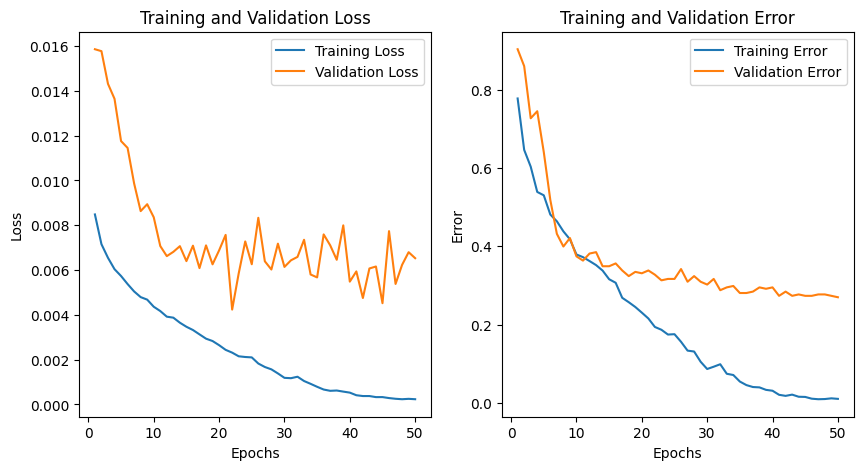

Final Training Loss: 0.00023201290966693377
Final Validation Loss: 0.006527370686153714
Final Training Error: 0.010374379792512404
Final Validation Error: 0.2697841726618705


In [ ]:
path = '/content/drive/MyDrive/APS 360 Team Folder/Dataset/Augmented Data'
batch_size = 256
small = True
train_loader, val_loader, test_loader = get_data(path, batch_size, small)
model = ComplexCNN()
train(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-4, checkpoint_frequency=500)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

9
2
2


# Testing metrics

In [4]:
class VGGMark9(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = 'VGGMark9'

        # VGG Block 1
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # VGG Block 2
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # VGG Block 3
        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # VGG Block 4
        self.block4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # VGG Block 5
        self.block5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Global Average Pooling Layer
        self.global_pool = nn.AdaptiveAvgPool2d(1)

        # Fully Connected Layers
        self.fc1 = nn.Linear(512, 4096)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(4096, 4096)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(4096, 9)  # Assuming 9 classes

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)

        # Global Average Pooling
        x = self.global_pool(x)
        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

class SingleClassDataset(torch.utils.data.Dataset):
    def __init__(self, class_dir, new_label):
        # Store the path to the images, new label, and transform
        self.class_dir = class_dir
        self.new_label = new_label
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            ])
        # Get all image file paths
        self.image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load the image
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # Apply transform if provided
        image = self.transform(image)
        # Return the image and the new label
        return image, self.new_label

def evaluate2(model, data_loader):
  total_loss, total_err, total = 0.0, 0.0, 0
  criterion = nn.CrossEntropyLoss()
  model.eval()  # Set the model to evaluation mode
  if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
  with torch.no_grad():
      for imgs, labels in data_loader:
          if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
          outputs = model(imgs)
          loss = criterion(outputs, labels)
          total_loss += loss.item()
          err = (outputs.argmax(dim=1) != labels).sum().item()
          total_err += err
          total += labels.size(0)
  model.train()  # Reset the model to training mode
  return total_err / total, total_loss / len(data_loader.dataset)

categories = [
    'actinic keratosis',
    'basal cell carcinoma',
    'dermatofibroma',
    'melanoma',
    'nevus',
    'pigmented benign keratosis',
    'seborrheic keratosis',
    'squamous cell carcinoma',
    'vascular lesion'
]

loaders = []

for i in range(len(categories)):
  path = '/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data/Train/' + categories[i]
  dataset = SingleClassDataset(path, i)
  loader = DataLoader(dataset,batch_size=len(dataset)//4, shuffle=False)
  loaders.append(loader)

model = VGGMark9()
model_state = torch.load("/content/drive/MyDrive/U of T/APS 360 Team Folder/Trained Model and File/model_final")
model.load_state_dict(model_state)

<All keys matched successfully>

In [5]:
for i in range(len(categories)):
  error, loss = evaluate2(model, loaders[i])
  print(f"Category: {categories[i]}, Error: {error}, Loss: {loss}")

KeyboardInterrupt: 

In [6]:
def all_data(path):
    transform = transforms.Compose([
        transforms.Resize((244, 244)),
        transforms.ToTensor()
    ])
    dataset = datasets.ImageFolder(path, transform=transform)
    loader = DataLoader(dataset,batch_size=len(dataset)//4, shuffle=False)
    return loader

def label_encoder(labels):
  for i in range(len(labels)):
    if labels[i] == 1 or labels[i] == 3 or labels[i] == 7:
      labels[i] = 1
    else:
      labels[i] = 0
  return labels

def advanced_evaluate(model, data_loader):
  cancer_total, non_cancer_total = 0, 0
  false_positive, false_negative = 0, 0
  true_positive, true_negative = 0, 0
  if torch.cuda.is_available():
    model = model.cuda()
  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():
      for imgs, labels in data_loader:
          if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
          outputs = model(imgs)
          outputs = outputs.argmax(dim=1)
          labels = label_encoder(labels)
          outputs = label_encoder(outputs)
          for i in range(len(labels)):
            if labels[i] == 0 and outputs[i] == 0:
              true_negative += 1
            elif labels[i] == 0 and outputs[i] == 1:
              false_positive += 1
            elif labels[i] == 1 and outputs[i] == 0:
              false_negative += 1
            elif labels[i] == 1 and outputs[i] == 1:
              true_positive += 1

  cancer_total = true_positive + false_negative
  non_cancer_total = true_negative + false_positive
  fprate = false_positive / non_cancer_total
  fnrate = false_negative / cancer_total
  tprate = true_positive / cancer_total
  tnrate = true_negative / non_cancer_total
  return fprate, fnrate, tprate, tnrate

In [11]:
def all_data_2(path):
    transform = transforms.Compose([
        transforms.Resize((244, 244)),
        transforms.ToTensor()
    ])
    dataset = datasets.ImageFolder(path, transform=transform)
    loader = DataLoader(dataset,batch_size=64, shuffle=True)
    return loader
weird_loader = all_data_2('/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data/Train')

In [12]:
train_loader, val_loader, test_loader = get_data('/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data', 64, True)
loader = all_data('/content/drive/MyDrive/U of T/APS 360 Team Folder/Dataset/Augmented Data/Train')

In [ ]:
fprate, fnrate, tprate, tnrate = advanced_evaluate(model, loader)
print(f"False Positive Rate: {fprate}\nFalse Negative Rate: {fnrate}\nTrue Positive Rate: {tprate}\nTrue Negative Rate: {tnrate}")

In [ ]:
error, loss = evaluate2(model, train_loader)
print(f"Train Error: {error}, Loss: {loss}")
error, loss = evaluate2(model, val_loader)
print(f"Val Error: {error}, Loss: {loss}")
error, loss = evaluate2(model, test_loader)
print(f"Test Error: {error}, Loss: {loss}")
error, loss = evaluate2(model, loader)
print(f"Total Error: {error}, Loss: {loss}")

Train Error: 0.032927379341452415, Loss: 0.0020293398568281516
Val Error: 0.02158273381294964, Loss: 0.0012898386888232805
Test Error: 0.02527075812274368, Loss: 0.0011203682406499497


In [ ]:
error, loss = evaluate2(model, weird_loader)
print(f"Train Error: {error}, Loss: {loss}")

In [ ]:
def evaluate3(model, data_loader1, data_loader2, data_loader3):
  loaders = [data_loader1, data_loader2, data_loader3]
  total_loss, total_err, total = 0.0, 0.0, 0
  criterion = nn.CrossEntropyLoss()
  model.eval()  # Set the model to evaluation mode
  if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
  with torch.no_grad():
    for loader in loaders:
      for imgs, labels in loader:
          if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
          outputs = model(imgs)
          loss = criterion(outputs, labels)
          total_loss += loss.item()
          err = (outputs.argmax(dim=1) != labels).sum().item()
          total_err += err
          total += labels.size(0)
  model.train()  # Reset the model to training mode
  return total_err / total, total_loss / (len(data_loader1.dataset)+len(data_loader2.dataset)+len(data_loader3.dataset))

error, loss = evaluate3(model, train_loader, val_loader, test_loader)
print(f"Tot Error: {error}, Loss: {loss}")

In [13]:
print(len(loader.dataset))
print(len(train_loader.dataset))
print(len(val_loader.dataset))
print(len(test_loader.dataset))
print(len(weird_loader.dataset))

2772
2217
278
277
2772
